<a href="https://colab.research.google.com/github/talcala66/talcala66/blob/main/Practica2ClaseTeoria_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Tarea 1 (Igual que apartados 8, 9, 10 PRACTICA 1)

## a. SIMULAR MODELO lm
set.seed(123)
n <- 150
x <- runif(n)
beta0 <- 1.5
beta1 <- 2.5
sigma <- 3
y <- beta0 + beta1 * x + rnorm(n, sd = 3)

In [4]:
## b. SIMULAR MUESTRAS DEL MODELO
nreplicas <- 200

set.seed(123)
y <- beta0 + beta1 * x + # R recicla/repite el vector x por columnas
  matrix(rnorm(n * nreplicas, sd = 3), nrow = n, ncol = nreplicas)

In [5]:
## c. PARAMETROS AJUSTADOS DE LAS MUESTRAS

# OPCION 1 (hace falta entender como funciona lm con replicas de y, ajusta un modelo para cada columna)
models <- lm(y ~ x)
hat    <- rbind(
  models$coefficients,
  "sigma" = sapply(summary(models), FUN = function(x) x$sigma)
) # matriz con 1a fila b0, 2a fila b1, 3a fila sigma; y replicas por columnas


NULL

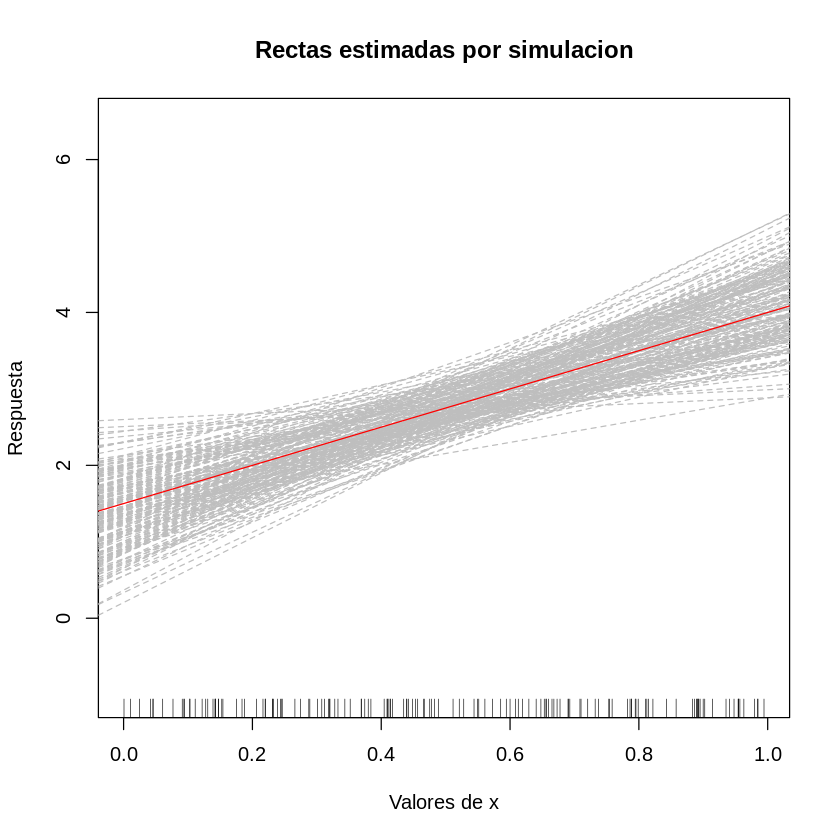

In [6]:
## d. PLOT RECTAS

# OPCION 1 (con apply)
plot(sort(x), seq(beta0 - beta1, beta0 + 2 * beta1, length.out = n),
     type = "n", xlab = "Valores de x", ylab = "Respuesta",
     main = "Rectas estimadas por simulacion")
apply(hat[1:2, ], 2, function(x) abline(a = x[1], b = x[2], lty = 2, col = "grey"))
abline(a = beta0, b = beta1, col = "red")
rug(x)

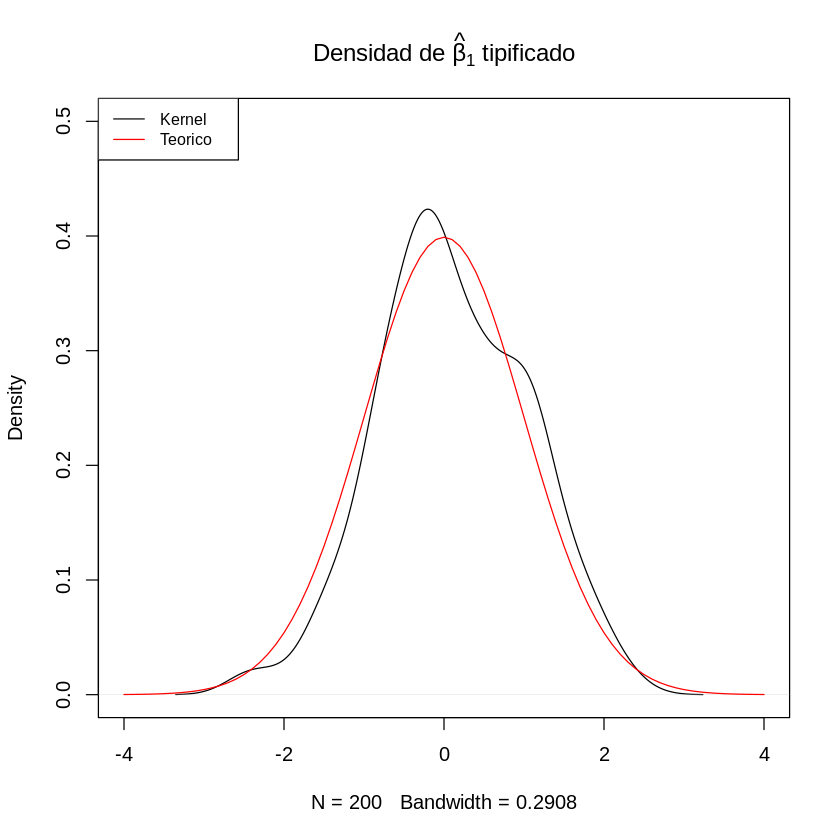

In [7]:
## Tarea 2

## a. Estimador kernel de la densidad de beta1 y densidad normal teorica
# preguntar como trabajan las funciones
?density      # para estimar el kernel de la densidad
?plot.density # para dibujarlo
?expression   # para crear texto incluyendo formulas (por si es util, pero no es necesario)

hatbeta1_tipificado <-
  (hat[2,] - beta1) / (sigma / (sqrt(n - 1) * sd(x)))
x0 <- seq(-4, 4, 0.1)

plot(density(hatbeta1_tipificado),
     main = expression("Densidad de " * hat(beta)[1] * " tipificado"),
     xlim = c(-4, 4), ylim = c(0, 0.5))
lines(x0, dnorm(x0), col = "red")
legend("topleft", legend = c("Kernel", "Teorico"),
       col = c("black", "red"), lty = 1, cex = 0.8) # anade una leyenda


In [8]:
## b. Contraste de normalidad

# IMPORTANTE: Para instalar Rcmdr desde R incluir dependencies = TRUE
# tambien puede dar problemas el no tener la ultima version de: R, las librerias, y RStudio
# una alternativa para trabajar en Rcmdr sin necesitar R es buscar R-UCA en internet y descargarlo

install.packages("Rcmdr", dependencies = TRUE) # solo la primera vez que se instale
library("Rcmdr")
# si se cierra la pestana de Rcmdr, Commander() vuelve a abrirla

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘rbibutils’, ‘coda’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘mitools’, ‘RcppArmadillo’, ‘Rdpack’, ‘checkmate’, ‘arm’, ‘sandwich’, ‘readstata13’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘survey’, ‘estimability’, ‘insight’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘zoo’, ‘litedown’, ‘mvtnorm’, ‘TH.data’, ‘mi’, ‘RcmdrMisc’, ‘car’, ‘effects’, ‘tcltk2’, ‘abind’, ‘relimp’, ‘lme4’, ‘aplpack’, ‘colorspace’, ‘e1071’, ‘Hmisc’, ‘leaps’, ‘lmtest’, ‘markdown’, ‘multcomp’, ‘nortest’, ‘rgl’, ‘sem’


Warning message in install.packages("Rcmdr", dependencies = TRUE):
“installation of package ‘readstata13’ had non-zero exit status”
Warning message in install.packages("Rcmdr", dependencies = TRUE):
“installation of package ‘insight’ had non-zero exit status”
Warning message in install.pack

ERROR: Error in library("Rcmdr"): there is no package called ‘Rcmdr’


In [10]:
# en Rcmdr se debe definir un data frame para trabajar
df <- data.frame("b1" = hatbeta1_tipificado)

# Para el test de normalidad, en Rcmdr: Estadisticos > Resumenes > Test de normalidad...
# La orden que utiliza Rcmdr
#normalityTest(~b1, test="shapiro.test", data=df)

# la libreria goftest tambien admite comparacion con otras distribuciones
install.packages("goftest")
library("goftest")
ad.test(hatbeta1_tipificado, null = "pnorm")
cvm.test(hatbeta1_tipificado, null = "pnorm")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Normal distribution
	Parameters assumed to be fixed

data:  hatbeta1_tipificado
An = 1.6939, p-value = 0.1363



	Cramer-von Mises test of goodness-of-fit
	Null hypothesis: Normal distribution
	Parameters assumed to be fixed

data:  hatbeta1_tipificado
omega2 = 0.26779, p-value = 0.1671


In [11]:
# Tarea 3


## Lectura de datos

# Se pide cargar el conjunto de datos `Heights` del paquete `alr4`.

if (!require("alr4")) install.packages("alr4") # instala el paquete si no lo esta
library("alr4") # carga el paquete
data("Heights") # carga el conjunto de datos (ubicado en un paquete cargado, alr4)


Loading required package: alr4

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘alr4’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘effects’


Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [12]:
class(Heights)   # clase del objeto (en este caso data.frame, df)
dim(Heights)     # dimension del df
names(Heights)   # nombre de las columnas del df
head(Heights, n = 3) # 3 primeras filas del df
summary(Heights) # resumen por columnas del df

[1] "data.frame"

[1] 1375    2

[1] "mheight" "dheight"

,mheight,dheight
,<dbl>,<dbl>
1,59.7,55.1
2,58.2,56.5
3,60.6,56.0


    mheight         dheight     
 Min.   :55.40   Min.   :55.10  
 1st Qu.:60.80   1st Qu.:62.00  
 Median :62.40   Median :63.60  
 Mean   :62.45   Mean   :63.75  
 3rd Qu.:63.90   3rd Qu.:65.60  
 Max.   :70.80   Max.   :73.10  

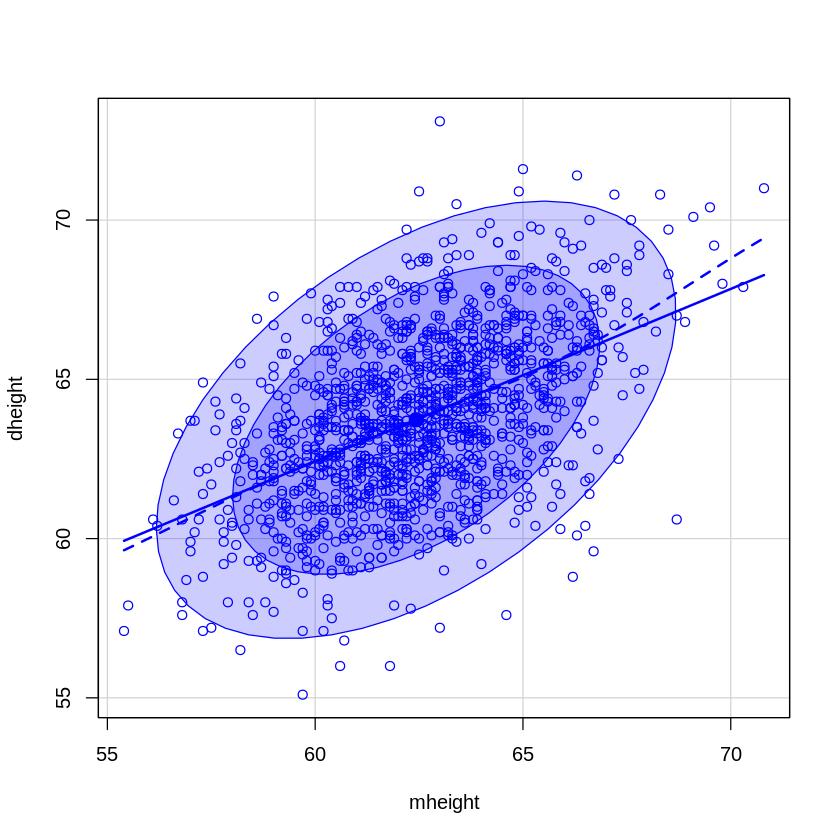

In [13]:
scatterplot(dheight~mheight, regLine=TRUE, smooth=list(span=0.5, spread=FALSE),
  boxplots=FALSE, ellipse=list(levels=c(.9, .99)), data=Heights)

In [14]:
model <- lm(dheight ~ mheight, data = Heights)
summary(model) # resumen del lm


Call:
lm(formula = dheight ~ mheight, data = Heights)

Residuals:
   Min     1Q Median     3Q    Max 
-7.397 -1.529  0.036  1.492  9.053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.91744    1.62247   18.44   <2e-16 ***
mheight      0.54175    0.02596   20.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.266 on 1373 degrees of freedom
Multiple R-squared:  0.2408,	Adjusted R-squared:  0.2402 
F-statistic: 435.5 on 1 and 1373 DF,  p-value: < 2.2e-16


In [15]:
names(summary(model))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [16]:
model$coefficients



(Intercept)     mheight 
  29.917437    0.541747

In [17]:
summary(model)$coefficients
  # summary(model)$coefficients[, 1] # Equiv. 1a columna
  summary(model)$coefficients[, "Estimate"]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),29.917437,1.62246940,18.43945,5.211879e-68
mheight,0.541747,0.02596069,20.86797,3.216915e-84


(Intercept)     mheight 
  29.917437    0.541747